In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('/content/House Price Prediction Dataset.csv')

In [70]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
df.shape

(2000, 10)

In [4]:
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


In [5]:
df['Location'].value_counts().sort_values(ascending=False)

,count
Location,
Downtown,558
Urban,485
Suburban,483
Rural,474


In [6]:
df['Condition'].value_counts().sort_values(ascending=False)

,count
Condition,
Fair,521
Excellent,511
Poor,507
Good,461


In [7]:
df['Garage'].value_counts().sort_values(ascending=False)

,count
Garage,
No,1038
Yes,962


In [8]:
df['Location'].value_counts().values

array([558, 485, 483, 474])

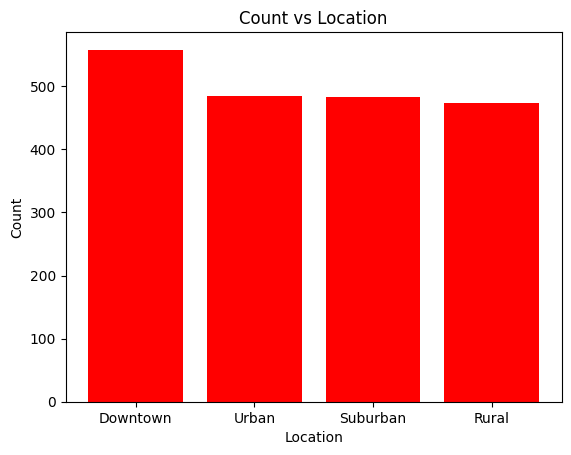

In [9]:
plt.bar(df['Location'].value_counts().index,df['Location'].value_counts().values,color='red')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count vs Location')
plt.show()

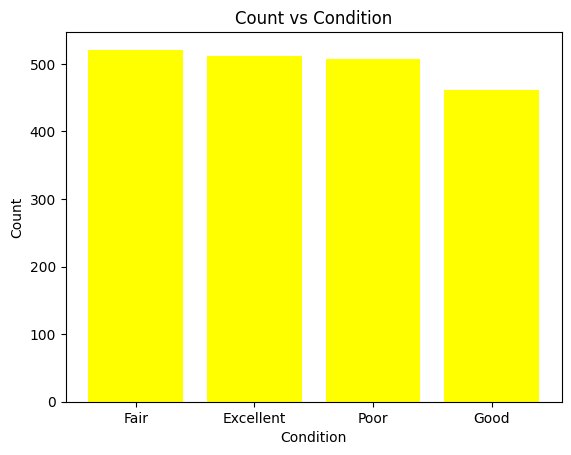

In [10]:
plt.bar(df['Condition'].value_counts().index,df['Condition'].value_counts().values,color='yellow')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Count vs Condition')
plt.show()

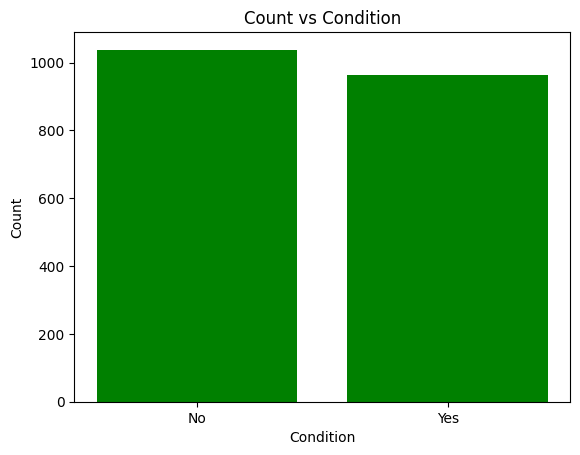

In [11]:
plt.bar(df['Garage'].value_counts().index,df['Garage'].value_counts().values,color='green')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Count vs Condition')
plt.show()

In [12]:
df['Bathrooms'].value_counts().sort_values(ascending=False)

,count
Bathrooms,
3,524
4,521
2,494
1,461


In [13]:
df['Bedrooms'].value_counts().sort_values(ascending=False)

,count
Bedrooms,
1,418
3,406
4,405
5,403
2,368


In [14]:
df['Floors'].value_counts().sort_values(ascending=False)

,count
Floors,
2,691
1,661
3,648


In [15]:
sample = df.sample(100)

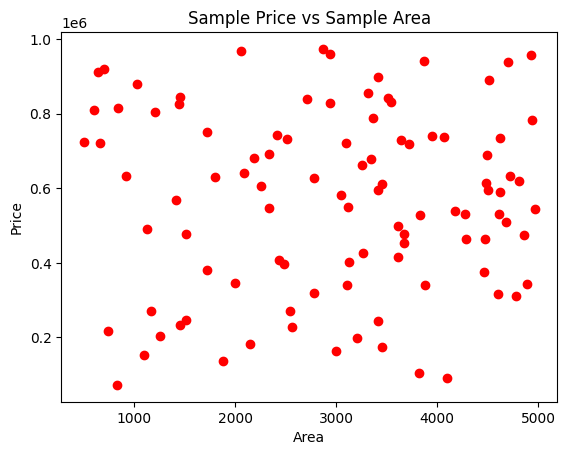

In [16]:
plt.scatter(sample['Area'],sample['Price'],color='Red')
plt.title('Sample Price vs Sample Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [17]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [18]:
df.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [19]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [71]:
df = df.drop('Id',axis=1)

In [72]:
df = df.drop('YearBuilt',axis=1)

In [73]:
df.head()

,Area,Bedrooms,Bathrooms,Floors,Location,Condition,Garage,Price
0,1360,5,4,3,Downtown,Excellent,No,149919
1,4272,5,4,3,Downtown,Excellent,No,424998
2,3592,2,2,3,Downtown,Good,No,266746
3,966,4,2,2,Suburban,Fair,Yes,244020
4,4926,1,4,2,Downtown,Fair,Yes,636056


In [74]:
df.shape

(2000, 8)

In [75]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [76]:
transformer = ColumnTransformer(
    transformers=[
        ('trf1',OrdinalEncoder(categories=[['Rural','Suburban','Urban','Downtown'],['Poor','Fair','Good','Excellent'],['No','Yes']]),['Location','Condition','Garage'])
        ],remainder='passthrough')



In [77]:
X = df.iloc[:,0:8]
y = df.iloc[:,-1]

In [78]:
X

,Area,Bedrooms,Bathrooms,Floors,Location,Condition,Garage,Price
0,1360,5,4,3,Downtown,Excellent,No,149919
1,4272,5,4,3,Downtown,Excellent,No,424998
2,3592,2,2,3,Downtown,Good,No,266746
3,966,4,2,2,Suburban,Fair,Yes,244020
4,4926,1,4,2,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,Suburban,Poor,No,295620
1996,3046,5,2,1,Suburban,Poor,Yes,580929
1997,1062,5,1,2,Rural,Poor,No,476925
1998,4062,3,1,2,Urban,Excellent,Yes,161119


In [79]:
X.shape

(2000, 8)

In [80]:
y

,Price
0,149919
1,424998
2,266746
3,244020
4,636056
...,...
1995,295620
1996,580929
1997,476925
1998,161119


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [82]:
X_train = transformer.fit_transform(X_train)

In [83]:
X_test = transformer.transform(X_test)

In [84]:
X_train

array([[2.00000e+00, 2.00000e+00, 1.00000e+00, ..., 4.00000e+00,
        2.00000e+00, 5.27032e+05],
       [3.00000e+00, 2.00000e+00, 1.00000e+00, ..., 3.00000e+00,
        3.00000e+00, 4.31059e+05],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        3.00000e+00, 7.44896e+05],
       ...,
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 4.00000e+00,
        1.00000e+00, 1.05916e+05],
       [2.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        3.00000e+00, 3.52811e+05],
       [3.00000e+00, 3.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        1.00000e+00, 2.99220e+05]])

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scale = StandardScaler()

In [87]:
X_train_new = scale.fit_transform(X_train)

In [88]:
X_test_new = scale.transform(X_test)

In [89]:
X_train.shape

(1600, 8)

In [55]:
from sklearn.linear_model import LinearRegression

In [90]:
lr = LinearRegression()

In [91]:
lr.fit(X_train_new,y_train)

LinearRegression()

In [92]:
y_pred = lr.predict(X_test_new)

In [93]:
y_pred

array([852377., 984581., 465660., 591567., 891081., 621952., 179909.,
       170283., 393288., 465000., 526870., 202842., 227561., 953606.,
       647013., 781670., 608236., 531503., 543406., 612347., 430129.,
        63338., 933527.,  77313., 593344., 745494., 232075., 910359.,
       519284., 844203., 155494., 638829., 685167., 667997., 713515.,
       731845., 579148., 971463., 371961., 544308., 186772., 722960.,
       495919., 787341., 572485.,  54329., 777688., 653685., 206547.,
       837071., 555920., 472418., 632678., 866615., 779055., 700009.,
       354592.,  63580., 325261., 558928., 674142., 658725., 502546.,
       477443.,  64568., 253570., 481172., 690083., 223412., 317544.,
       592528., 999453., 542646., 468161., 319072., 168968., 577800.,
       647689., 942724., 540674., 175801., 369733., 771202., 364942.,
       356932., 200434., 284152., 415130., 397509., 992969., 991902.,
       911525., 384384.,  69416., 638759., 698365., 428824., 487538.,
       536476., 3195

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_test,y_pred)

1.0

In [96]:
from xgboost import XGBRegressor

In [97]:
xgb = XGBRegressor()

In [102]:
xgb.fit(X_train_new,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [103]:
y_pred_xgb = xgb.predict(X_test_new)

In [104]:
y_test

,Price
1316,852377
1646,984581
1578,465660
941,591567
810,891081
...,...
716,544775
372,852699
1022,640846
556,839285


In [105]:
y_pred_xgb

array([849188.75 , 983997.06 , 466616.12 , 590028.8  , 893295.3  ,
       621719.6  , 176624.81 , 169226.38 , 395017.06 , 467611.38 ,
       526548.   , 204548.47 , 228941.28 , 953888.8  , 649371.44 ,
       779669.6  , 609113.56 , 533260.44 , 540390.6  , 609368.8  ,
       433298.22 ,  62859.97 , 935202.56 ,  74567.98 , 595468.25 ,
       746358.3  , 232706.28 , 910588.4  , 517401.2  , 844160.9  ,
       154230.67 , 638517.6  , 684499.06 , 667326.9  , 715610.06 ,
       731108.7  , 580866.94 , 969322.7  , 369078.34 , 545087.   ,
       186581.7  , 721450.06 , 495170.4  , 788524.44 , 572718.44 ,
        54165.05 , 777315.7  , 653262.4  , 203282.39 , 837034.6  ,
       556490.25 , 472585.62 , 630920.06 , 865048.94 , 781555.9  ,
       699413.3  , 353864.94 ,  62714.332, 324849.97 , 559493.44 ,
       674520.25 , 658265.3  , 501881.1  , 479553.25 ,  62891.37 ,
       256297.89 , 480359.4  , 688858.8  , 222078.28 , 317144.94 ,
       590164.56 , 997019.9  , 540192.56 , 467190.4  , 320626.

In [106]:
r2_score(y_test,y_pred_xgb)

0.9999542832374573